In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.pyplot import figure
from sklearn import preprocessing

In [2]:
cd /Users/mihaelanemes/Desktop/s2ds/data/Data/

/Users/mihaelanemes/Desktop/s2ds/data/Data


In [3]:
# read csv file - note all data is for Wales only

food_and_you_wales = pd.read_csv("food_and_you_all_waves_wales.csv")

# remove values that are 'refused to answer', 'unknown' etc as nan

food_and_you_wales = food_and_you_wales.replace ([-9, -8, -1, 98], np.nan)   

# replace 'not applicable' in specific columns

cols = ['q4_1_4', 'q4_1_5a', 'Q4_1_5_comb', 'q4_1_6', 'q4_1_7', 'q4_1_8a', 'q4_1_8b', 'sanspray', 'q4_1_11',
        'q4_1_12', 'q4_1_13', 'q4_1_14', 'q4_1_15', 'q4_1_16', 'q4_1_17', 'q4_1_18', 'q4_1_19']

food_and_you_wales[cols] = food_and_you_wales[cols].replace([5], np.nan)

# standardize values by column - not needed in this script

food_and_you_wales_std = preprocessing.StandardScaler(food_and_you_wales, with_mean=False)


In [4]:
# select data of interest for a particular plot

temp = food_and_you_wales[['surveyyear', 'age_dv', 'RespSex', 'religion_dv','hhdinc', 'workstat2', 
                           'wimd_2014_quintile',
                           'Q4_1_5_comb', 'q4_1_6', 'q4_1_7', 'q4_1_8a', 'q4_1_8b']]  

# create columns of interest for dataframe

waves = np.repeat(a = [1,2,3,4,5], repeats = 4)
wave_type = np.tile(waves, 2)
male_female = np.repeat(a = [1,2], repeats = 20)
resp_values = ['1','2','3','4']*10

# calculate percentage values for variable of interest

gender_Q4_1_5_comb = temp.groupby(['RespSex', 'surveyyear', 
                                   'Q4_1_5_comb'])["Q4_1_5_comb"].sum().groupby(level=0).transform(lambda x: 100 * x/x.sum())

# gender_Q4_1_5_comb = temp.groupby(['RespSex','surveyyear','Q4_1_5_comb'])["Q4_1_5_comb"].agg({'Q4_1_5_comb':'sum'})
# gender_Q4_1_5_comb = gender_Q4_1_5_comb.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# build dataframe to pass on seaborn 

grid = pd.DataFrame({
    "gender": male_female,
    "wave": wave_type,
    "resp": resp_values,
    "resp_perc": gender_Q4_1_5_comb
})


In [14]:


print(grid)


                                gender  wave resp  resp_perc
RespSex surveyyear Q4_1_5_comb                              
1       1          1.0               1     1    1   0.428449
                   2.0               1     1    2   1.713796
                   3.0               1     1    3   0.257069
                   4.0               1     1    4   7.540703
        2          1.0               1     2    1   0.599829
                   2.0               1     2    2   1.199657
                   3.0               1     2    3   0.257069
                   4.0               1     2    4   6.855184
        3          1.0               1     3    1   7.712082
                   2.0               1     3    2   4.455870
                   3.0               1     3    3   1.799486
                   4.0               1     3    4  15.766924
        4          1.0               1     4    1   8.911740
                   2.0               1     4    2   2.742074
                   3.0  

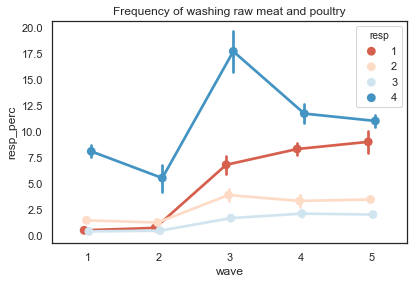

In [5]:
# plotting here 

sns.set(style="white")

ans = {  1	:'Never'
        ,2	:'Sometimes'
        ,3	:'Most of the time'
        ,4	:'Always'
      }

# replace answers keys with real answers in the created df

grid = grid.replace({"resp": ans})

ax1 = sns.pointplot (x = "wave", y = "resp_perc", hue = "resp", data = grid, kind ="point", dodge=True,
              palette = "RdBu")

# labels=['Never', 'Sometimes', 'Most of the time', 'Always']

# plt.legend(['Never', 'Sometimes', 'Most of the time', 'Always'], bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout()
plt.title('Frequency of washing raw meat and poultry')
plt.show()

In [33]:
print(grid)


                                gender  wave resp  resp_perc
RespSex surveyyear Q4_1_5_comb                              
1       1          1.0               1     1    1   0.428449
                   2.0               1     1    2   1.713796
                   3.0               1     1    3   0.257069
                   4.0               1     1    4   7.540703
        2          1.0               1     2    1   0.599829
                   2.0               1     2    2   1.199657
                   3.0               1     2    3   0.257069
                   4.0               1     2    4   6.855184
        3          1.0               1     3    1   7.712082
                   2.0               1     3    2   4.455870
                   3.0               1     3    3   1.799486
                   4.0               1     3    4  15.766924
        4          1.0               1     4    1   8.911740
                   2.0               1     4    2   2.742074
                   3.0  

In [46]:
# select data of interest for a particular plot

temp = food_and_you_wales[['surveyyear', 'age_dv', 'RespSex', 'religion_dv','hhdinc', 'workstat2', 
                           'wimd_2014_quintile', 'bpoison']]  

# create columns of interest for dataframe

wave = np.repeat(a = [1,2,3,4,5], repeats = 2)
wave_type = np.tile(wave, 2)
male_female = np.repeat(a = [1,2], repeats = 10)
resp_values = np.tile(['1','2'], 10)

# calculate percentage values for variable of interest

gender_bpoison_comb = temp.groupby(['RespSex', 'surveyyear', 
                                   'bpoison'])["bpoison"].sum().groupby(level=0).transform(lambda x: 100 * x/x.sum())

# gender_Q4_1_5_comb = temp.groupby(['RespSex','surveyyear','Q4_1_5_comb'])["Q4_1_5_comb"].agg({'Q4_1_5_comb':'sum'})
# gender_Q4_1_5_comb = gender_Q4_1_5_comb.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

# build dataframe to pass on seaborn 

grid_2 = pd.DataFrame({
    "gender": male_female,
    "wave": wave_type,
    "resp": resp_values,
    "resp_perc": gender_bpoison_comb
})

print (grid_2)


                            gender  wave resp  resp_perc
RespSex surveyyear bpoison                              
1       1          1.0           1     1    1   1.405622
                   2.0           1     1    2   5.823293
        2          1.0           1     2    1   1.305221
                   2.0           1     2    2   4.819277
        3          1.0           1     3    1   8.232932
                   2.0           1     3    2  22.489960
        4          1.0           1     4    1   7.429719
                   2.0           1     4    2  19.076305
        5          1.0           1     5    1   6.927711
                   2.0           1     5    2  22.489960
2       1          1.0           2     1    1   1.398601
                   2.0           2     1    2   5.361305
        2          1.0           2     2    1   1.048951
                   2.0           2     2    2   4.662005
        3          1.0           2     3    1   5.769231
                   2.0         

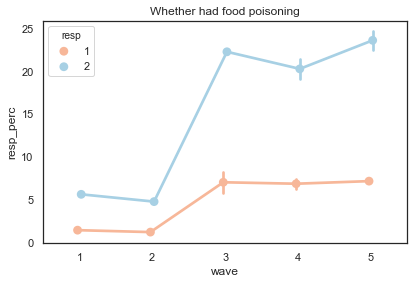

In [47]:
# plotting here 

sns.set(style="white")

ax1 = sns.pointplot (x = "wave", y = "resp_perc", hue = "resp", data = grid_2, kind ="point", dodge=True,
              palette = "RdBu")

# labels=['Never', 'Sometimes', 'Most of the time', 'Always']

# plt.legend(['Never', 'Sometimes', 'Most of the time', 'Always'], bbox_to_anchor=(1.05, 1.0), loc='upper left')

plt.tight_layout()
plt.title('Whether had food poisoning')
plt.show()

In [ ]:

# custom function for plotting to specify the % number on top

def f(x,y, **kwargs):
    ax = sns.lineplot(x,y,**kwargs)
    for i in range(len(x)):
        ax.annotate(str(y.values[i]), xy=(x.values[i], y.values[i]),fontsize=8,
                    xytext = (0,10), textcoords="offset points",
                color=kwargs.get("color","k"), 
                va='center', ha='center')





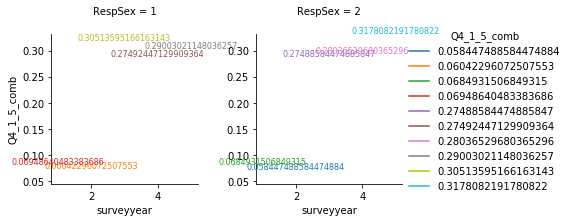

In [11]:
# plot features of interest from the created 'temp' subset

# sns.set(style="ticks")
# grid = sns.FacetGrid(gender_Q4_1_5_comb, col="surveyyear", hue="Q4_1_5_comb", palette="tab20c")



g = sns.FacetGrid(temp, col='RespSex', hue='Q4_1_5_comb') 
g = (g.map(f, 'surveyyear', 'Q4_1_5_comb')
     .add_legend())

g.set_titles(pad = 20) # '{row_name}' ' | ' '{col_name}'
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True, labelleft=True)

In [ ]:
# do triple groupby for each var of interest: wave, answer to the Q and demographic 

gender_Q4_1_5_comb = temp.groupby(['RespSex','surveyyear','Q4_1_5_comb'])["Q4_1_5_comb"].agg({'Q4_1_5_comb':'sum'})
gender_Q4_1_5_comb = gender_Q4_1_5_comb.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

age_Q4_1_5_comb = temp.groupby(['age_dv', 'surveyyear', 'Q4_1_5_comb']).agg({'Q4_1_5_comb':'sum'})
age_Q4_1_5_comb = age_Q4_1_5_comb.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

religion_Q4_1_5_comb = temp.groupby(['religion_dv', 'surveyyear', 'Q4_1_5_comb']).agg({'Q4_1_5_comb':'sum'})
religion_Q4_1_5_comb = religion_Q4_1_5_comb.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

income_Q4_1_5_comb = temp.groupby(['hhdinc', 'surveyyear', 'Q4_1_5_comb']).agg({'Q4_1_5_comb':'sum'})
income_Q4_1_5_comb = income_Q4_1_5_comb.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

poverty_Q4_1_5_comb = temp.groupby(['wimd_2014_quintile', 'surveyyear', 'Q4_1_5_comb']).agg({'Q4_1_5_comb':'sum'})
poverty_Q4_1_5_comb = poverty_Q4_1_5_comb.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

grid_data = pd.DataFrame (['gender_Q4_1_5_comb', 'age_Q4_1_5_comb', 'religion_Q4_1_5_comb',
                         'income_Q4_1_5_comb', 'poverty_Q4_1_5_comb']) 

# reset index to keep the other variables not only the Q of interest

#gender_Q4_1_5_comb.index = gender_Q4_1_5_comb.index.droplevel(0)
#gender_Q4_1_5_comb = gender_Q4_1_5_comb.reset_index()

#gender_Q4_1_5_comb.reset_index(drop=True)


Text(0.5, 1.0, 'how often do you wash raw meat excl chicken')

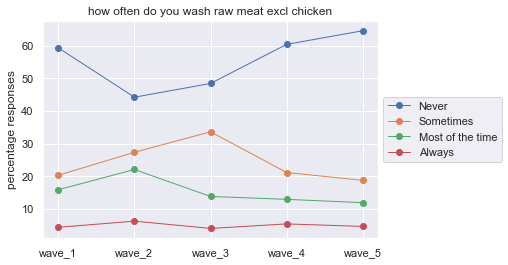

In [117]:
# clunky code - don't run!


# save responses from each wave in a new matrix variable

wave1 = [1]
food_and_you_wales_wave1 = food_and_you_wales.loc [food_and_you_wales['surveyyear'].isin(wave1)]

wave2 = [2]
food_and_you_wales_wave2 = food_and_you_wales.loc [food_and_you_wales['surveyyear'].isin(wave2)]

wave3 = [3]
food_and_you_wales_wave3 = food_and_you_wales.loc [food_and_you_wales['surveyyear'].isin(wave3)]

wave4 = [4]
food_and_you_wales_wave4 = food_and_you_wales.loc [food_and_you_wales['surveyyear'].isin(wave4)]

wave5 = [5]
food_and_you_wales_wave5 = food_and_you_wales.loc [food_and_you_wales['surveyyear'].isin(wave5)]

# create var to save all waves in one place

all_waves = { 'wave1':['food_and_you_wales_wave1'], 'wave2':['food_and_you_wales_wave2'],
             'wave3':['food_and_you_wales_wave3'], 'wave4':['food_and_you_wales_wave4'], 
             'wave5':['food_and_you_wales_wave5'] }

# calculate % of each response 

var_wave1 = food_and_you_wales_wave1['Q4_1_5_comb'].value_counts()/food_and_you_wales_wave1['Q4_1_5_comb'].count()*100
var_wave2 = food_and_you_wales_wave2['Q4_1_5_comb'].value_counts()/food_and_you_wales_wave2['Q4_1_5_comb'].count()*100
var_wave3 = food_and_you_wales_wave3['Q4_1_5_comb'].value_counts()/food_and_you_wales_wave3['Q4_1_5_comb'].count()*100
var_wave4 = food_and_you_wales_wave4['Q4_1_5_comb'].value_counts()/food_and_you_wales_wave4['Q4_1_5_comb'].count()*100
var_wave5 = food_and_you_wales_wave5['Q4_1_5_comb'].value_counts()/food_and_you_wales_wave5['Q4_1_5_comb'].count()*100

x_axis = [0,1,2,3,4]
y_axis = [var_wave1,var_wave2, var_wave3, var_wave4, var_wave5]


# plot by % - show trend over waves; line plot with percentage for data point and number of responses in brackets 
# time-series line plot - x-axis: waves; y-axis: %; data point labels: % value and no of responses; 
# example using data from fig 2.7: Q4_1_5_comb; q4_1_6; q4_1_7; q4_1_8a; q4_1_8b

%matplotlib inline
# plt.style.use('seaborn-whitegrid'
fig_raw_meat = plt.plot (x_axis, y_axis, 'o', linewidth=1.0, linestyle="-")

plt.xticks([0, 1, 2, 3, 4],
          ['wave_1','wave_2','wave_3','wave_4','wave_5'])
plt.ylabel('percentage responses')

plt.legend(['Never', 'Sometimes', 'Most of the time', 'Always'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('how often do you wash raw meat excl chicken')